In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

In [ ]:
commune = pd.read_excel(r'commune.xlsx')
enroll = pd.read_csv(r'enroll.csv')
industry = pd.read_csv(r'industry.csv')
ord = pd.read_csv(r'ord.csv')
quest = pd.read_csv(r'quest.csv')
study_domain = pd.read_csv(r'study_domain.csv')
technology = pd.read_csv(r'technology.csv')
transaction = pd.read_csv(r'transaction.csv')

In [ ]:
commune.head(1)

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08


In [ ]:
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)

In [ ]:
commune["commune"] = commune["commune"].str.lower()

In [ ]:
enroll.head(1)

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN


In [ ]:
industry.head(1)

,Unnamed: 0,key,values,quest_id
0,0,item1,Finance,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
ord.head(1)

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601


In [ ]:
quest.head(1)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601


In [ ]:
study_domain.head(1)

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
technology.head(1)

,Unnamed: 0,key,values,quest_id
0,0,item1,R,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
transaction.head(1)

,Unnamed: 0,created_at,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952


In [ ]:
def dummies (data):
  get_dum = pd.get_dummies(data[['quest_id','values']], columns=['values'],prefix='', prefix_sep='')
  return get_dum

In [ ]:
def merging (a,b):
  df= pd.merge(left=b, right=b, how="left", on="quest_id")
  return df

In [ ]:
def group (data):
  df = data.groupby('quest_id').sum()
  return df

In [ ]:
technology1 = dummies(technology)

In [ ]:
technology2 = group(technology1)

In [ ]:
study_domain1 = dummies(study_domain)

In [ ]:
study_domain2 = group(study_domain1)

In [ ]:
industry1 = dummies(industry)

In [ ]:
industry2 = group(industry1)

In [ ]:
enroll.head(1)

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN


In [ ]:
quest = quest.drop(['Unnamed: 0','modified_at', 'department', 'university', 'study_domain', 'current_employed'], axis=1)

In [ ]:
quest.head()

,gender,dob,commune,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,male,17/05/1996,ht0111,2021-02-16T16:56:30.579504Z,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601
3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [ ]:
quest.rename(columns={'created_at':'Application date', 'hear_AA_1':'Communication channels', 'after_AA':'Bootcamp Insterest', 'education_level':'Education Level', 'have_computer_home':'Have computer at home', 'internet_at_home':'Have internet at home', 'formal_sector_job':'Job is formal'}, inplace = True)
quest['dob'].replace({'3 aout 1977': '3/08/1977'}, inplace = True)
quest['dob'] = pd.to_datetime(quest['dob'])

In [ ]:
def takeDate(x):
  x = x.str[:10]
  return pd.to_datetime(x)

quest['Application date'] = takeDate(quest['Application date'])

In [ ]:
quest['age'] = ((quest['Application date']-quest['dob'])//365)

In [ ]:
ma = np.mean(quest['age'])
ma
quest['age'].fillna(ma, inplace = True)

In [ ]:
def convAge(x):
   x = int(x)
   return x

quest['age'] = quest['age'].apply(lambda x: convAge(str(x) [:2]))

In [ ]:
quest.columns

Index(['gender', 'dob', 'commune', 'Application date', 'Education Level',
       'Job is formal', 'Have computer at home', 'Have internet at home',
       'Communication channels', 'Bootcamp Insterest', 'quest_id', 'age'],
      dtype='object')

In [ ]:
concat1 = pd.concat((ord, transaction), axis= 0)

In [ ]:
concat1.rename(columns={'created_at':'Payement date'}, inplace= True)

In [ ]:
concat1.columns

Index(['Unnamed: 0', 'Payement date', 'user_id', 'product_name', 'product_id',
       'amount_dollars', 'amount_cents', 'subscription', 'coupon_code',
       'coupon_id', 'affiliate_referral_code', 'status', 'quest_id',
       'modified_at', 'course_id', 'transaction_id'],
      dtype='object')

In [ ]:
concat1['Payed'] = 'Yes'
enroll['is_enroll'] = 'Yes'

In [ ]:
concat1.columns

Index(['Unnamed: 0', 'Payement date', 'user_id', 'product_name', 'product_id',
       'amount_dollars', 'amount_cents', 'subscription', 'coupon_code',
       'coupon_id', 'affiliate_referral_code', 'status', 'quest_id',
       'modified_at', 'course_id', 'transaction_id', 'Payed'],
      dtype='object')

In [ ]:
enroll.rename(columns = {'created_at': 'Enroll date'}, inplace= True)
enroll['is_enroll'] = np.where(enroll['Enroll date'].isna(), 'No', 'Yes')
enroll = enroll[['Enroll date','is_enroll','quest_id', "user_id"]]

In [ ]:
df= pd.merge( left= enroll, right= concat1[['Payement date', 'user_id','quest_id','Payed',]], how= 'left', on= 'user_id')

In [ ]:
df['is_enroll']= df['is_enroll'].fillna('No')
df['Payed']= df['Payed'].fillna('No')

In [ ]:
df.rename(columns={"quest_id_x": "quest_id"}, inplace=True)

In [ ]:
df1 = pd.merge(left= quest, right= df, how= 'left', on= 'quest_id')

In [ ]:
df1.columns


Index(['gender', 'dob', 'commune', 'Application date', 'Education Level',
       'Job is formal', 'Have computer at home', 'Have internet at home',
       'Communication channels', 'Bootcamp Insterest', 'quest_id', 'age',
       'Enroll date', 'is_enroll', 'user_id', 'Payement date', 'quest_id_y',
       'Payed'],
      dtype='object')

In [ ]:
quest.columns

Index(['gender', 'dob', 'commune', 'Application date', 'Education Level',
       'Job is formal', 'Have computer at home', 'Have internet at home',
       'Communication channels', 'Bootcamp Insterest', 'quest_id', 'age'],
      dtype='object')

In [ ]:
df2 = pd.merge(left = df1, right = study_domain2, how= 'left', on= 'quest_id')

In [ ]:
study_domain2

,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
quest_id,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,1,0,0,0
905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1
905ec1ec-ce95-11eb-8136-7c67a234f601,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
906b3c84-ce95-11eb-8c2a-7c67a234f601,0,0,0,0,0,0,0,0,1
906b3c85-ce95-11eb-9b87-7c67a234f601,0,0,0,0,0,0,1,0,0
906b3c86-ce95-11eb-b6a7-7c67a234f601,0,0,0,0,0,0,0,1,0


In [ ]:
df3 = pd.merge(left= df2, right= technology2, how= 'left', on= 'quest_id')

In [ ]:
df4 = pd.merge(left= df3, right= commune[['Commune_FR', 'Departement', 'commune']], how='left', on='commune')

In [ ]:
df4.columns

Index(['gender', 'dob', 'commune', 'Application date', 'Education Level',
       'Job is formal', 'Have computer at home', 'Have internet at home',
       'Communication channels', 'Bootcamp Insterest', 'quest_id', 'age',
       'Enroll date', 'is_enroll', 'user_id', 'Payement date', 'quest_id_y',
       'Payed', 'Accounting', 'Computer Science', 'Economics',
       'Electrical Engineering', 'Law', 'Management', 'Medicine', 'Statistics',
       'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript', 'PHP',
       'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y',
       'Commune_FR', 'Departement'],
      dtype='object')

In [ ]:
df4.shape

(250, 41)

In [ ]:
df4 = df4.drop(['quest_id_y', 'Departement', 'Commune_FR','user_id'], axis= 1)

In [ ]:
df4.shape

(250, 37)

###  1. How many observations and variables are there in the dataset
 

In [ ]:
# here your codes
print(f'The final dataset has {df4.shape[0]} obsevations and {df4.shape[1]} variables.')

The final dataset has 250 obsevations and 37 variables.


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [ ]:
#Average age for the observations
total_average = df4['age'].mean()
print('The average for the whole dataset is: ', np.round(total_average, 2))
average_male= df4[df4['gender'] == 'male']['age'].mean()
print('The average for the whole male dataset is: ', np.round(average_male, 2))
average_female = df4[df4['gender'] == 'female']['age'].mean()
print('The average for the whole female dataset is: ', np.round(average_female, 2))

The average for the whole dataset is:  26.47
The average for the whole male dataset is:  26.79
The average for the whole female dataset is:  25.11


In [ ]:
#Variance
total_variance = df4['age'].var()
print('The variance for the whole dataset is: ', np.round(total_variance, 2))
variance_male= df4[df4['gender'] == 'male']['age'].var()
print('The variance for the whole male dataset is: ', np.round(variance_male, 2))
variance_female = df4[df4['gender'] == 'female']['age'].var()
print('The variance for the whole female dataset is: ', np.round(variance_female, 2))

The variance for the whole dataset is:  50.88
The variance for the whole male dataset is:  49.45
The variance for the whole female dataset is:  55.88


In [ ]:
#Kurtosis
total_kurtosis = df4['age'].kurtosis()
print('The kurtosis for the whole dataset is: ', np.round(total_kurtosis, 2))
kurtosis_male= df4[df4['gender'] == 'male']['age'].kurtosis()
print('The kurtosis for the whole male dataset is: ', np.round(kurtosis_male, 2))
kurtosis_female = df4[df4['gender'] == 'female']['age'].kurtosis()
print('The kurtosis for the whole female dataset is: ', np.round(kurtosis_female, 2))

The kurtosis for the whole dataset is:  5.21
The kurtosis for the whole male dataset is:  5.36
The kurtosis for the whole female dataset is:  5.49


In [ ]:
#Skewness
total_skewness = df4['age'].skew()
print('The skewness for the whole dataset is: ', np.round(total_skewness, 2))
skewness_male= df4[df4['gender'] == 'male']['age'].skew()
print('The skewness for the whole male dataset is: ', np.round(skewness_male, 2))
skewness_female = df4[df4['gender'] == 'female']['age'].skew()
print('The skewness for the whole female dataset is: ', np.round(skewness_female, 2))

The skewness for the whole dataset is:  -0.7
The skewness for the whole male dataset is:  -0.66
The skewness for the whole female dataset is:  -0.83


In [ ]:
#Is the age distribution follow a normal distribution
from scipy.stats import shapiro
norm1 = shapiro(df4['age'])
print('For the whole dataset: ', np.round(norm1, 2))
norm2 = shapiro(df4[df4['gender'] == 'male']['age'])
print('For the whole male dataset: ', np.round(norm2, 2))
norm3 = shapiro(df4[df4['gender'] == 'female']['age'])
print('For the whole female dataset: ', np.round(norm3, 2))
print('The age distribution follow a normal distribution')

For the whole dataset:  [0.85 0.  ]
For the whole male dataset:  [0.86 0.  ]
For the whole female dataset:  [0.81 0.  ]
The age distribution follow a normal distribution


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

For the whole dataset 



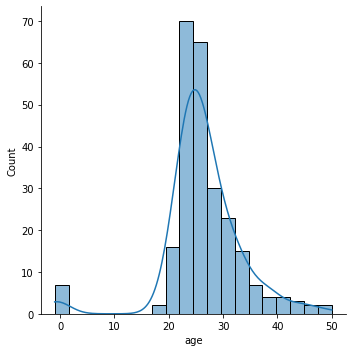

In [ ]:
print('For the whole dataset \n')
sns.displot(df4['age'],bins = 20 ,kde = True)

For the whole male dataset 



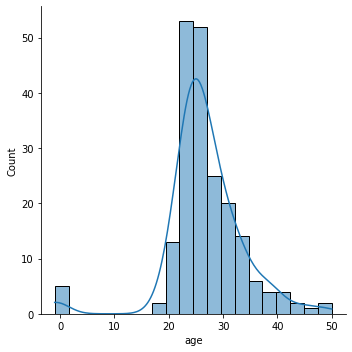

In [ ]:
print('For the whole male dataset \n')
sns.displot(df4[df4['gender'] == 'male']['age'], bins = 20, kde = True)

For the whole female dataset 



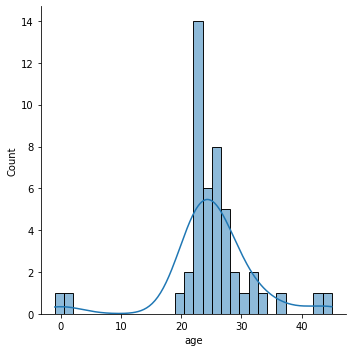

In [ ]:
print('For the whole female dataset \n')
sns.displot(df4[df4['gender']== 'female']['age'],bins= 30,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [ ]:
#here your codes
from scipy.stats import wilcoxon
stat, p = wilcoxon(df4.age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
alpha = 0.05
if p > alpha:
	print("ho =24 (Don't reject H0)")
else:
	print('h1 !=24 (Reject H0)')

Statistics=5520.50, p=0.00
h1 !=24 (Reject H0)


### 5. Calculate the average age of participants for each communication channel

In [ ]:
#here your codes
average = df4[['age', 'Communication channels']].groupby('Communication channels').mean()
print('Average age of participants for each communication channel')
print(average.sort_values('age', axis=0))

Average age of participants for each communication channel
                               age
Communication channels            
unknown                  22.000000
ESIH                     23.500000
Instagram                24.600000
Facebook                 26.050000
Bootcamp Alumni          26.285714
WhatsApp                 26.515152
Friend                   26.567164
Ayiti Analytics Website  27.000000
other                    28.444444
LinkedIn                 29.933333


### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Communication channels')

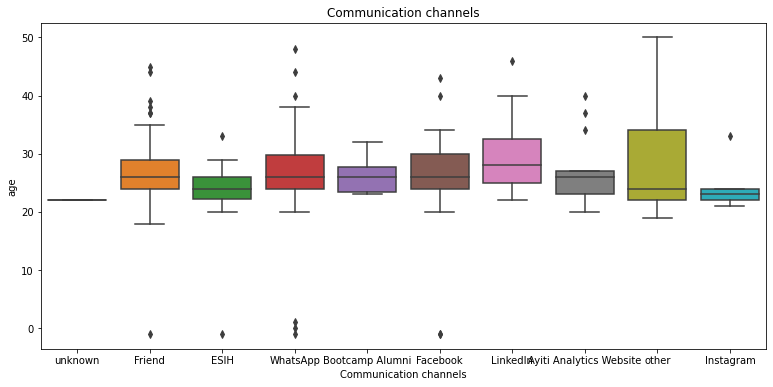

In [ ]:
#here your codes
plt.figure(figsize =(13,6))
sns.boxplot(data = df4, x ="Communication channels", y ="age")
plt.title('Communication channels')

### 7 .Is there a significant age difference between these groups

In [ ]:
#here your codes
unknown_channel = df4[df4['Communication channels'] == 'unknown']['age'].values
facebook_channel = df4[df4['Communication channels'] == 'Facebook']['age'].values
friend_channel = df4[df4['Communication channels'] == 'Friend']['age'].values
esih_channel = df4[df4['Communication channels'] == 'ESIH']['age'].values
whatsapp_channel = df4[df4['Communication channels'] == 'WhatsApp']['age'].values
bootcamp_channel = df4[df4['Communication channels'] == 'Bootcamp Alumni']['age'].values
linkedly_channel = df4[df4['Communication channels'] == 'LinkedIn']['age'].values
analytic_channel = df4[df4['Communication channels'] == 'Ayiti Analytics Website']['age'].values
other_chanel = df4[df4['Communication channels'] == 'other']['age'].values
instagram = df4[df4['Communication channels'] == 'Instagram']['age'].values

In [ ]:
Channels=unknown_channel,facebook_channel,friend_channel,esih_channel,whatsapp_channel,bootcamp_channel,linkedly_channel,analytic_channel,other_chanel,instagram

In [ ]:
unknown_channel

array([22])

In [ ]:
unknown_channel.shape

(1,)

In [ ]:
facebook_channel

array([26, 43, 28, 22, 34, 31, 24, 33, 25, 23, 40, 24, 28, 21, 24, 30, 20,
       26, 30, 23, 24, 26, 30, 25, 33, 30, 28, 21, -1, 21, 32, -1, 24, 25,
       29, 34, 25, 27, 28, 27])

In [ ]:
facebook_channel.shape

(40,)

In [ ]:
friend_channel

array([24, 24, 28, 22, 44, 32, 20, 22, 31, 25, 20, 18, 24, 26, 23, 22, 22,
       26, 25, 37, 31, 24, 29, 26, -1, 22, 29, 29, 24, 26, 22, 32, 26, 24,
       26, 30, 39, 26, 28, 24, 29, 24, 28, 25, 24, 20, 38, 25, 28, 25, 25,
       27, 23, 45, 28, 28, 23, 23, 25, 24, 21, 29, 35, 33, 37, 30, 27])

In [ ]:
friend_channel.shape

(67,)

In [ ]:
esih_channel

array([24, 24, 29, 33, 26, 26, 25, 28, 23, 21, 29, 23, 22, 22, 23, 26, 20,
       -1])

In [ ]:
esih_channel.shape

(18,)

In [ ]:
whatsapp_channel

array([23, 32, 24, 23, 27, 23, 25, 27, -1, 29, 34, 24, 26, 24, 24, 23, 34,
       25, 27, 37, 25, 24, 25, 33, 24, 30, 31, 33, 34, 26, 23, 25, 24, 27,
       23, 29, 25, 21, 21, 48, 31, 26, 25,  0, 28, 24, 26, 30, 26, 27,  1,
       28, 20, 26, 22, 44, 32, 28, 38, 29, 23, 40, 37, 28, 27, 23])

In [ ]:
whatsapp_channel.shape

(66,)

In [ ]:
bootcamp_channel

array([26, 26, 25, 23, 28, 23, 23, 31, 26, 23, 29, 26, 32, 27])

In [ ]:
bootcamp_channel.shape

(14,)

In [ ]:
linkedly_channel

array([28, 22, 25, 31, 24, 22, 40, 46, 30, 25, 33, 28, 32, 37, 26])

In [ ]:
linkedly_channel.shape

(15,)

In [ ]:
instagram.shape

(5,)

In [ ]:
other_chanel

array([24, 19, 25, 50, 21, 22, 38, 23, 34])

In [ ]:
other_chanel.shape

(9,)

In [ ]:
df4["Communication channels"].unique()

array(['unknown', 'Friend', 'ESIH', 'WhatsApp', 'Bootcamp Alumni',
       'Facebook', 'LinkedIn', 'Ayiti Analytics Website', 'other',
       'Instagram'], dtype=object)

In [ ]:
from scipy.stats import f_oneway
stat, p = f_oneway(unknown_channel,facebook_channel,friend_channel,esih_channel,whatsapp_channel,bootcamp_channel,linkedly_channel,analytic_channel,other_chanel,instagram)
print(p)
if p < 0.5:
  print('Rejected')
else:
  print('Accepted')

0.5058273718145292
Accepted


### 8.Plan a BA strategy for each communication channel regarding the age group

In [ ]:
#here your codes

All the communication channels allow to reach a certain age but not all with the same amount of people. The communication channels that reach the maximum of people are the friends channel and the whasapp channel. Not only do they reach the maximum number of people, but they also reach all age groups that are susceptible. So it would be better to focus on these two channels.

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [ ]:
prob= pd.crosstab(df4.gender, df4['Communication channels'] ,margins=True, normalize="index")
for col in prob.columns:
  print (f"The probability of {col} knowing you are a woman is {round(prob.at['female',col],2)}")

The probability of Ayiti Analytics Website knowing you are a woman is 0.09
The probability of Bootcamp Alumni knowing you are a woman is 0.17
The probability of ESIH knowing you are a woman is 0.11
The probability of Facebook knowing you are a woman is 0.13
The probability of Friend knowing you are a woman is 0.23
The probability of Instagram knowing you are a woman is 0.02
The probability of LinkedIn knowing you are a woman is 0.02
The probability of WhatsApp knowing you are a woman is 0.19
The probability of other knowing you are a woman is 0.04
The probability of unknown knowing you are a woman is 0.0


In [ ]:
#here your codes
prob = df4[df4['gender'] =='female']['Communication channels']
prob.value_counts(normalize=1)

Friend                     0.234043
WhatsApp                   0.191489
Bootcamp Alumni            0.170213
Facebook                   0.127660
ESIH                       0.106383
Ayiti Analytics Website    0.085106
other                      0.042553
Instagram                  0.021277
LinkedIn                   0.021277
Name: Communication channels, dtype: float64

### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [ ]:
prob= pd.crosstab(df4.gender, df4['Communication channels'] ,margins=True, normalize="index")
for col in prob.columns:
  print(f"The probability of {col} knowing you are a man is: {round (prob.at['male',col],2)}")

The probability of Ayiti Analytics Website knowing you are a man is: 0.05
The probability of Bootcamp Alumni knowing you are a man is: 0.03
The probability of ESIH knowing you are a man is: 0.06
The probability of Facebook knowing you are a man is: 0.17
The probability of Friend knowing you are a man is: 0.28
The probability of Instagram knowing you are a man is: 0.02
The probability of LinkedIn knowing you are a man is: 0.07
The probability of WhatsApp knowing you are a man is: 0.28
The probability of other knowing you are a man is: 0.03
The probability of unknown knowing you are a man is: 0.0


In [ ]:
prob = df4[df4['gender'] == 'male']['Communication channels']
prob.value_counts(normalize=1)

WhatsApp                   0.280788
Friend                     0.275862
Facebook                   0.167488
LinkedIn                   0.068966
ESIH                       0.064039
Ayiti Analytics Website    0.054187
other                      0.034483
Bootcamp Alumni            0.029557
Instagram                  0.019704
unknown                    0.004926
Name: Communication channels, dtype: float64

### 11. Deduce the probability of being a woman knowing each communication channel

In [ ]:
#here your codes
prob2= pd.crosstab(df4.gender,df4['Communication channels'],margins=False,normalize='columns')
for col in prob2.columns:
  print(f"The proba of being a woman knowing {col} is :{round(prob2.at['female',col],2)}")

The proba of being a woman knowing Ayiti Analytics Website is :0.27
The proba of being a woman knowing Bootcamp Alumni is :0.57
The proba of being a woman knowing ESIH is :0.28
The proba of being a woman knowing Facebook is :0.15
The proba of being a woman knowing Friend is :0.16
The proba of being a woman knowing Instagram is :0.2
The proba of being a woman knowing LinkedIn is :0.07
The proba of being a woman knowing WhatsApp is :0.14
The proba of being a woman knowing other is :0.22
The proba of being a woman knowing unknown is :0.0


### 14. Deduce the probability of being a man knowing each communication channel

In [ ]:
#here your codes
prob3= pd.crosstab(df4.gender,df4['Communication channels'],margins=False,normalize='columns')
for col in prob3.columns:
  print(f"The proba of being a man knowing {col} is :{round(prob3.at['male',col],2)}")

The proba of being a man knowing Ayiti Analytics Website is :0.73
The proba of being a man knowing Bootcamp Alumni is :0.43
The proba of being a man knowing ESIH is :0.72
The proba of being a man knowing Facebook is :0.85
The proba of being a man knowing Friend is :0.84
The proba of being a man knowing Instagram is :0.8
The proba of being a man knowing LinkedIn is :0.93
The proba of being a man knowing WhatsApp is :0.86
The proba of being a man knowing other is :0.78
The proba of being a man knowing unknown is :1.0


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [ ]:
#here 
from scipy.stats import chi2_contingency
prob4 = pd.pivot_table(df4,'age',index='Communication channels',columns=['Bootcamp Insterest'],aggfunc = ['count'],fill_value=0,margins = True)
prob4
stat, p, dof,s= chi2_contingency(prob4) 
print("p value: " + str(p)) 
if p <= 0.05: 
    print('Reject') 
else: 
    print('Accept')

p value: 1.2931351228431785e-10
Reject


In [ ]:
stat, p, dof,s= chi2_contingency(prob4) 
print("p value: " + str(p)) 
if p <= 0.05: 
  print('Reject') 
else: 
  print('Accept') 

p value: 1.2931351228431785e-10
Reject


In [ ]:
prob5= pd.pivot_table(data = df4, columns= 'Communication channels', index= 'gender', aggfunc='count', fill_value=0)
prob5

Accounting                  ... quest_id        
Communication channels Ayiti Analytics Website Bootcamp Alumni  ...    other unknown
gender                                                          ...                 
female                                       4               8  ...        2       0
male                                        10               6  ...        7       1

[2 rows x 350 columns]

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

In [ ]:
# here your codes
display= pd.pivot_table(data = df4, columns= 'Bootcamp Insterest', index= 'Communication channels', aggfunc='count', fill_value=0)
display

Accounting  ... quest_id
Bootcamp Insterest      Finding a job/internship  ...  unknown
Communication channels                            ...         
Ayiti Analytics Website                        1  ...        0
Bootcamp Alumni                                3  ...        1
ESIH                                           2  ...        0
Facebook                                      10  ...        0
Friend                                        10  ...        0
Instagram                                      2  ...        0
LinkedIn                                       2  ...        0
WhatsApp                                      11  ...        0
other                                          2  ...        0
unknown                                        0  ...        1

[10 rows x 245 columns]

In [ ]:
pro = df4[df4['gender'] == 'male']['Bootcamp Insterest']
pro.value_counts(normalize=1)

Improving my data analysis skills    0.522167
Finding a job/internship             0.162562
Training to start my own company     0.162562
Switching careers                    0.083744
Mentorship                           0.044335
other                                0.014778
unknown                              0.009852
Name: Bootcamp Insterest, dtype: float64

In [ ]:
#display2= pd.pivot_table(data = df4, columns= 'Bootcamp Insterest', index= 'gender', aggfunc='count', fill_value=0)

p value: 0.9980190494040612
Accept


<Figure size 360x1080 with 0 Axes>

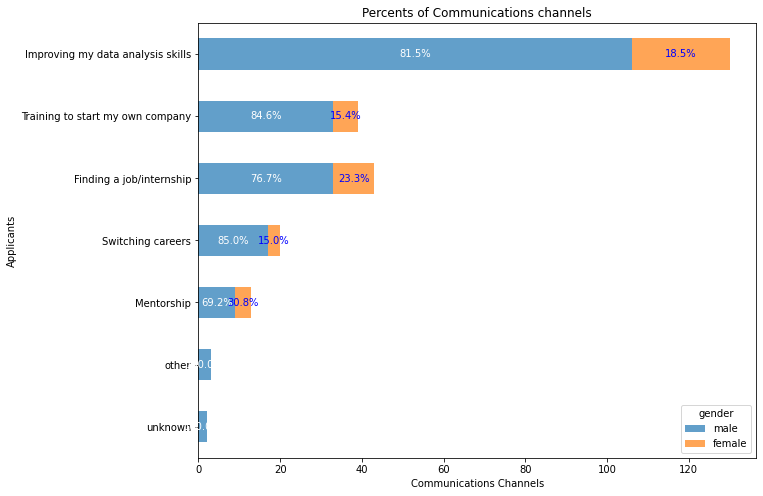

gender,female,male,All
Bootcamp Insterest,,,
Finding a job/internship,10,33,43
Improving my data analysis skills,24,106,130
Mentorship,4,9,13
Switching careers,3,17,20
Training to start my own company,6,33,39
other,0,3,3
unknown,0,2,2
All,47,203,250


In [ ]:
def display(data=df4,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  dff1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="age",aggfunc="count",fill_value=0,margins = True)
  #display(result1)
  stat, p, dof,s= chi2_contingency(dff1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject') 
  else: 
    print('Accept') 
  
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(dff1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = dff1.iloc[:-1,:].sort_values(by =('male'),ascending=True)
    ax =values.sort_values(by =('male'),ascending=True)[[('male'),('female')]].plot(kind="barh",figsize=(10,8),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel('Applicants')
    xlab = ax.set_xlabel('Communications Channels')
    title = ax.set_title('Percents of Communications channels')

    index =0
    for male, female ,total in zip(values[('male')],values[('female')], values[('All')]):
      if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(male + female/2 ,
              index,
              str(np.round((female/total)*100,1)) + "%",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
   
    
      index+=1
  plt.show()
  return dff1
display(df4,columns=['Bootcamp Insterest','gender'],significance_level=0.05,figsize=(5,15),heatmap=False)  

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [ ]:
#here your codes

The interests do not vary too much. 18.5% of women are interested in improving their data analysis skills and 23.3% are interested in finding a job very little or 15.4% are interested in starting their own company
which is not too different from men, the only difference is that they are much more interested in starting their own company than finding a job.
If we want to find a more accessible way of communication for women and men, it is the channels friends, whatsapp and facebook.

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [ ]:
n12 = len(df4[df4['Payed'] == 'Yes'])
n12n = 250-n12

In [ ]:
df5 = pd.pivot_table(df4[df4['Payed'] == 'Yes'], values= 'quest_id', index=['Bootcamp Insterest', 'Communication channels', 'gender'], aggfunc= 'count')
df5 =df5/n12
print('Bootcamp Interest,Communication channels,Gender/Yes Payed')
print(df5)

Bootcamp Interest,Communication channels,Gender/Yes Payed
                                                                  quest_id
Bootcamp Insterest                Communication channels  gender          
Finding a job/internship          Ayiti Analytics Website male    0.015385
                                  Bootcamp Alumni         female  0.015385
                                  ESIH                    male    0.015385
                                  Facebook                male    0.015385
                                  Friend                  female  0.015385
                                                          male    0.030769
                                  Instagram               male    0.015385
                                  LinkedIn                male    0.015385
                                  WhatsApp                female  0.015385
                                                          male    0.046154
Improving my data analysis skills Ayiti An

In [ ]:
df5

quest_id
Bootcamp Insterest                Communication channels  gender          
Finding a job/internship          Ayiti Analytics Website male    0.015385
                                  Bootcamp Alumni         female  0.015385
                                  ESIH                    male    0.015385
                                  Facebook                male    0.015385
                                  Friend                  female  0.015385
                                                          male    0.030769
                                  Instagram               male    0.015385
                                  LinkedIn                male    0.015385
                                  WhatsApp                female  0.015385
                                                          male    0.046154
Improving my data analysis skills Ayiti Analytics Website male    0.015385
                                  Bootcamp Alumni         female  0.015385
                                                          male    0.076923
                                  ESIH                    male    0.030769
                                  Facebook                female  0.030769
                                                          male    0.076923
                                  Friend                  female  0.030769
                                                          male    0.215385
                                  LinkedIn                female  0.015385
                                                          male    0.015385
                                  WhatsApp                female  0.046154
                                                          male    0.046154
                                  other                   male    0.015385
Mentorship                        other                   female  0.015385
Switching careers                 Bootcamp Alumni         female  0.015385
Training to start my own company  Ayiti Analytics Website male    0.015385
                                  Facebook                male    0.015385
                                  Friend                  male    0.046154
                                  WhatsApp                male    0.030769
other                             ESIH                    male    0.015385
                                  WhatsApp                male    0.015385

In [ ]:
df6 = pd.pivot_table(df4[df4['Payed'] == 'No'], values= 'quest_id', index=['Bootcamp Insterest', "Communication channels", 'gender'], aggfunc= 'count')
df6 = df6/n12n
print('Bootcamp Interest,Communication channels,Gender/No Payed')
print(df6)

Bootcamp Interest,Communication channels,Gender/No Payed
                                                                  quest_id
Bootcamp Insterest                Communication channels  gender          
Finding a job/internship          Facebook                female  0.010811
                                                          male    0.005405
                                  Friend                  male    0.010811
                                  WhatsApp                male    0.016216
Improving my data analysis skills Ayiti Analytics Website male    0.005405
                                  ESIH                    male    0.010811
                                  Facebook                male    0.010811
                                  Friend                  male    0.016216
                                  LinkedIn                male    0.005405
                                  WhatsApp                male    0.021622
Mentorship                        Facebook 

In [ ]:
df6

quest_id
Bootcamp Insterest                Communication channels  gender          
Finding a job/internship          Facebook                female  0.010811
                                                          male    0.005405
                                  Friend                  male    0.010811
                                  WhatsApp                male    0.016216
Improving my data analysis skills Ayiti Analytics Website male    0.005405
                                  ESIH                    male    0.010811
                                  Facebook                male    0.010811
                                  Friend                  male    0.016216
                                  LinkedIn                male    0.005405
                                  WhatsApp                male    0.021622
Mentorship                        Facebook                female  0.005405
                                                          male    0.005405
Switching careers                 Friend                  male    0.010811
                                  Instagram               male    0.005405
                                  LinkedIn                male    0.005405
                                  WhatsApp                male    0.005405
Training to start my own company  ESIH                    male    0.005405
                                  Friend                  female  0.005405
                                                          male    0.005405
                                  LinkedIn                male    0.010811
                                  WhatsApp                male    0.010811
                                  other                   male    0.005405
unknown                           unknown                 male    0.005405

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [ ]:
# here your codes
df7 =df4[(df4['Bootcamp Insterest'] == 'Improving my data analysis skills') & (df4['Communication channels'] =='Friend') & (df4['gender'] == 'male')]
df8 = df7['Payed'].value_counts(normalize=1)
df8.rename(index = {'Yes':'Male applicant who pays, wants to increase skills and invited by friends', 'No': "Male applicant who doesn't pay, wants to increase skills and invited by friends"}, inplace= True)
df8

Male applicant who pays, wants to increase skills and invited by friends           0.823529
Male applicant who doesn't pay, wants to increase skills and invited by friends    0.176471
Name: Payed, dtype: float64

### Based on these findings, propose strategies to increase our sales?

In [ ]:
#here your codes

One of the objectives of ayiti analytics is to increase their sales but also to be efficient in their services. if ayiti anlytics wants to be efficient in increasing the data analysis skills for their clients it would not be too difficult for them to increase their sales.
First, we have seen that the means of communication to have more people are the channel friend and the channel whatsapp. so to reach more people to make them know his services, he will use these two channels without abandoning the other channels. because not only he will reach more people but also all the age groups necessary. Moreover, he will be able to use these two channels to make his own channel known, to visit it, to like it and to share it.
Although we have noticed that the channel that has the most non-paying people is the friend channel, we cannot afford not to use it because it is the channel that has the most people paying. so let's use a lot more channel. Advertise the services to be offered by showing customers benefits they may be interested in, benefits they will not refuse. not to offer services that will not interest customers. Find out what they want, why they want to pursue a career in data science, what their motivations are.
Then become more efficient in these requests, to satisfy customers as it should.
If our services meet their expectations, and we are efficient, our sales will increase as we go.